In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed


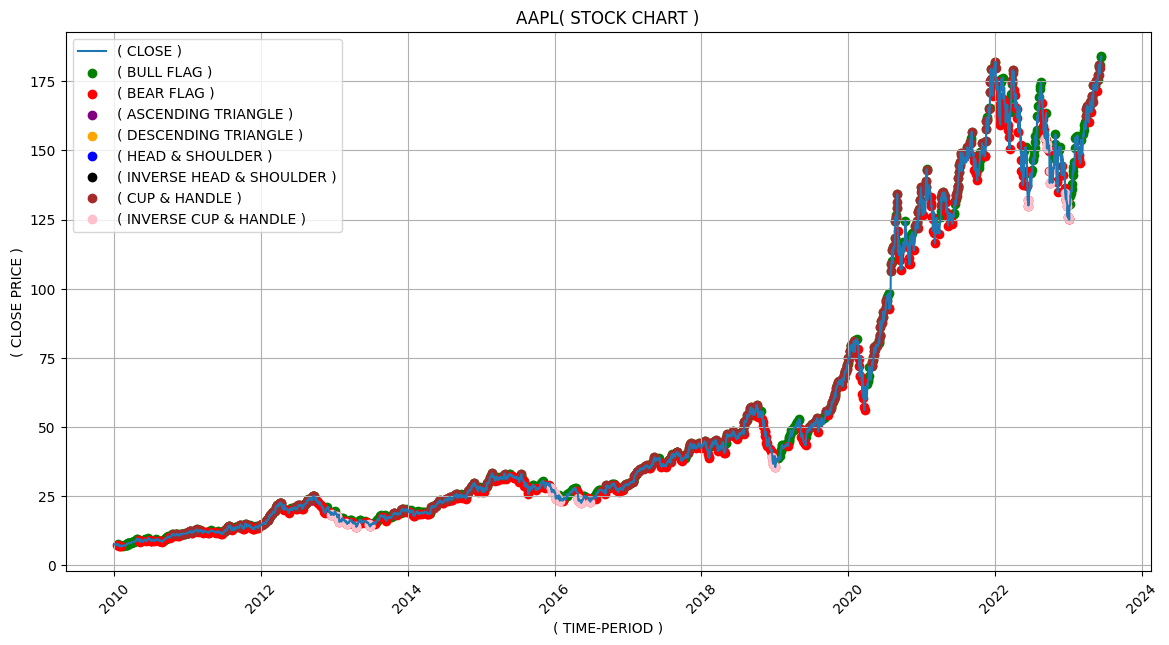

[*********************100%%**********************]  1 of 1 completed


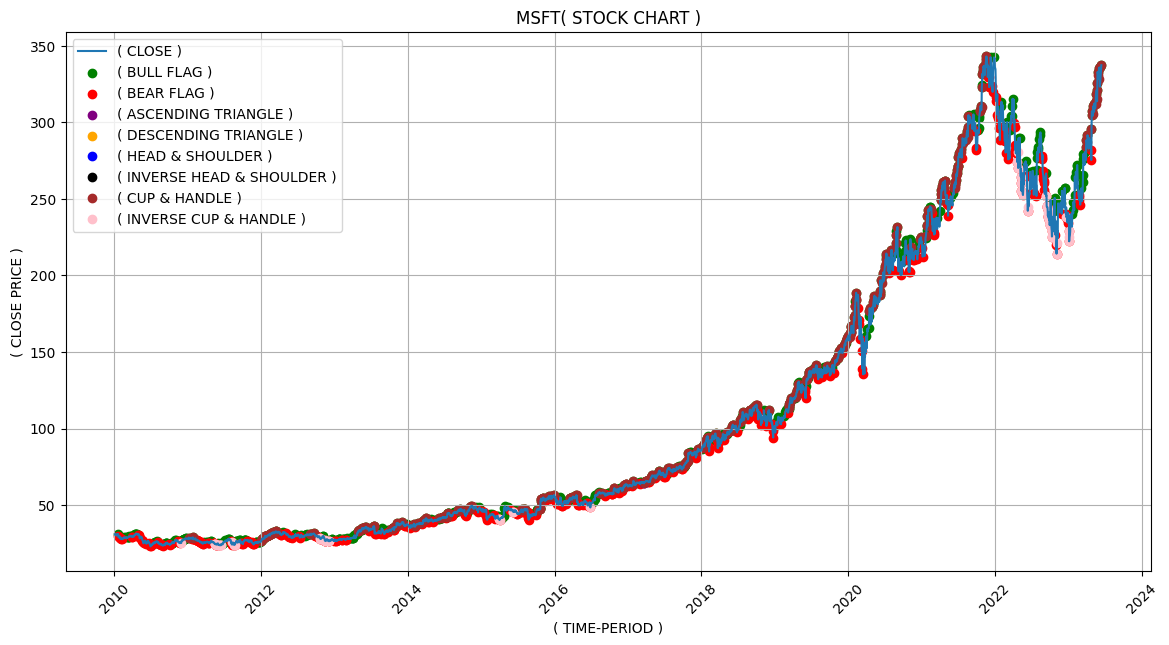

[*********************100%%**********************]  1 of 1 completed


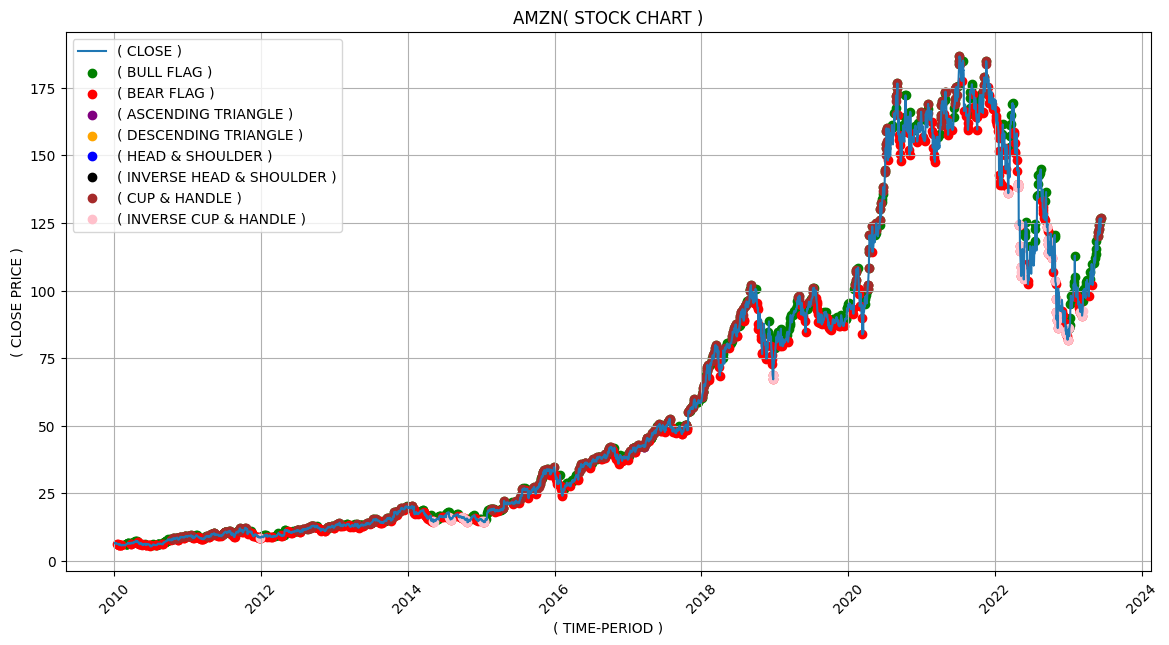

[*********************100%%**********************]  1 of 1 completed


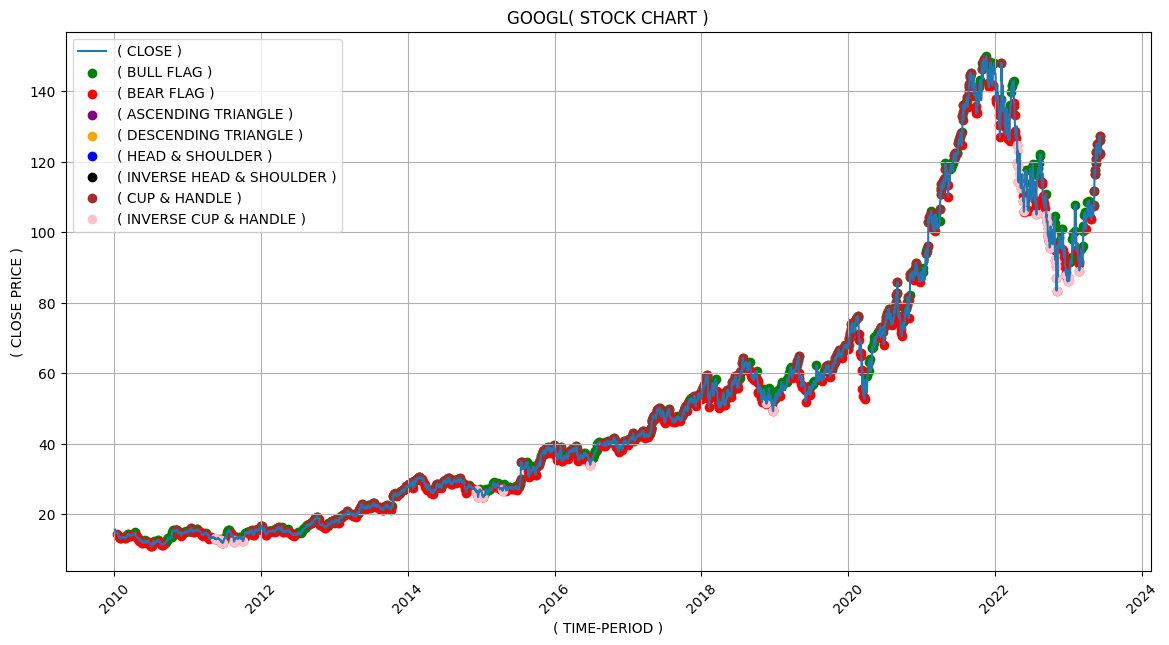

[*********************100%%**********************]  1 of 1 completed


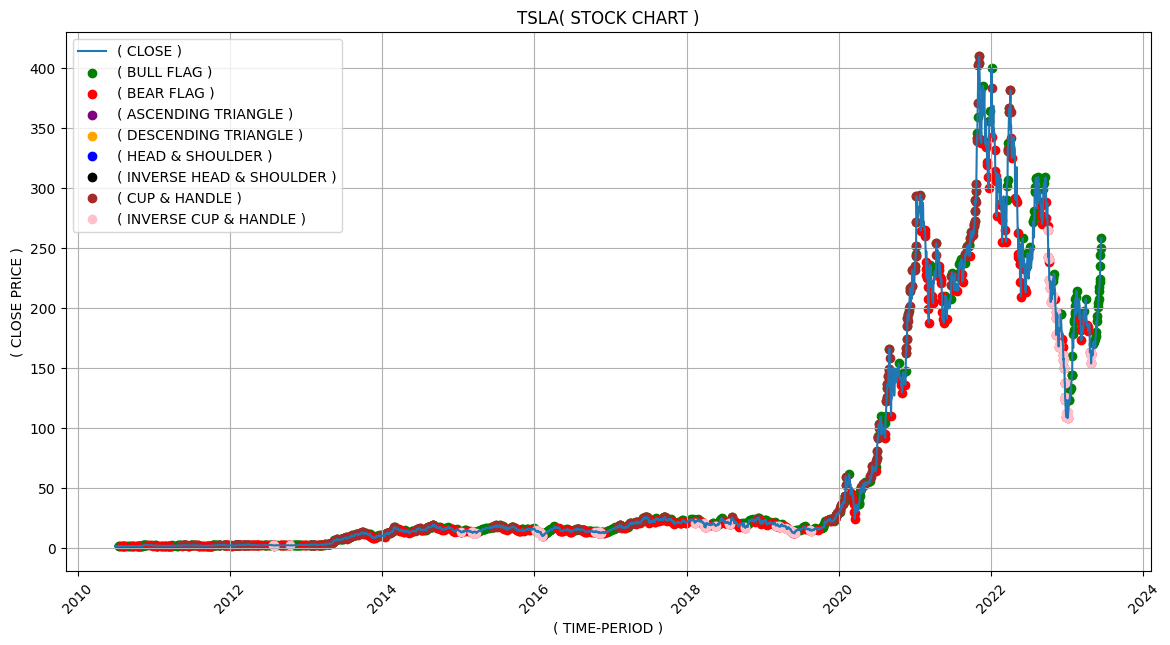

In [2]:

index=['AAPL','MSFT','AMZN','GOOGL','TSLA']

for symbol in index:
    index_data=yf.download(symbol, start='2010-01-01', end='2023-06-15')

    index_data['SMA_50'] = index_data['Close'].rolling(window=50).mean()
    index_data['SMA_200'] = index_data['Close'].rolling(window=200).mean()

    # Identifying Bull Flag Pattern
    is_bull_flag = (index_data['Close'].rolling(window=10).max() == index_data['Close'])
    index_data['BullFlag'] = is_bull_flag.astype(int)

    # Identifying Bear Flag Pattern
    is_bear_flag = (index_data['Close'].rolling(window=10).min() == index_data['Close'])
    index_data['BearFlag'] = is_bear_flag.astype(int)

    # Identifying Ascending Triangle Pattern
    is_ascending_triangle = (index_data['Low'].rolling(window=30).min() == index_data['Low']) & \
                            (index_data['High'].rolling(window=30).max().shift(1) == index_data['High'])
    index_data['AscendingTriangle'] = is_ascending_triangle.astype(int)

    # Identifying Descending Triangle Pattern
    is_descending_triangle = (index_data['High'].rolling(window=30).max() == index_data['High']) & \
                             (index_data['Low'].rolling(window=30).min().shift(1) == index_data['Low'])
    index_data['DescendingTriangle'] = is_descending_triangle.astype(int)

    # Identifying Head and Shoulders Pattern
    is_head_shoulder = (index_data['High'].rolling(window=30).max() == index_data['High']) & \
                       (index_data['Close'].rolling(window=10).min() == index_data['Close'])
    index_data['HeadShoulder'] = is_head_shoulder.astype(int)

    # Identifying Inverse Head and Shoulders Pattern
    is_inverse_head_shoulder = (index_data['Low'].rolling(window=30).min() == index_data['Low']) & \
                               (index_data['Close'].rolling(window=10).max() == index_data['Close'])
    index_data['InverseHeadShoulder'] = is_inverse_head_shoulder.astype(int)

    # Identifying Cup and Handle Pattern
    is_cup_handle = (index_data['High'].rolling(window=30).max() == index_data['High']) & \
                    (index_data['SMA_50'] > index_data['SMA_200'])
    index_data['CupHandle'] = is_cup_handle.astype(int)

    #  Identifying Inverse Cup and Handle Pattern
    is_inverse_cup_handle = (index_data['Low'].rolling(window=30).min() == index_data['Low']) & \
                            (index_data['SMA_50'] < index_data['SMA_200'])
    index_data['InverseCupHandle'] = is_inverse_cup_handle.astype(int)


    # STOCK CHART
    plt.figure(figsize=(14, 7))
    plt.plot(index_data.index, index_data['Close'], label='( CLOSE )')

    # PATTERN MARKERS
    plt.scatter(index_data[index_data['BullFlag'] == 1].index, index_data[index_data['BullFlag'] == 1]['Close'], marker='o', color='green', label='( BULL FLAG )')
    plt.scatter(index_data[index_data['BearFlag'] == 1].index, index_data[index_data['BearFlag'] == 1]['Close'], marker='o', color='red', label='( BEAR FLAG )')
    plt.scatter(index_data[index_data['AscendingTriangle'] == 1].index, index_data[index_data['AscendingTriangle'] == 1]['Close'], marker='o', color='purple', label='( ASCENDING TRIANGLE )')
    plt.scatter(index_data[index_data['DescendingTriangle'] == 1].index, index_data[index_data['DescendingTriangle'] == 1]['Close'], marker='o', color='orange', label='( DESCENDING TRIANGLE )')
    plt.scatter(index_data[index_data['HeadShoulder'] == 1].index, index_data[index_data['HeadShoulder'] == 1]['Close'], marker='o', color='blue', label='( HEAD & SHOULDER )')
    plt.scatter(index_data[index_data['InverseHeadShoulder'] == 1].index, index_data[index_data['InverseHeadShoulder'] == 1]['Close'], marker='o', color='black', label='( INVERSE HEAD & SHOULDER )')
    plt.scatter(index_data[index_data['CupHandle'] == 1].index, index_data[index_data['CupHandle'] == 1]['Close'], marker='o', color='brown', label='( CUP & HANDLE )')
    plt.scatter(index_data[index_data['InverseCupHandle'] == 1].index, index_data[index_data['InverseCupHandle'] == 1]['Close'], marker='o', color='pink', label='( INVERSE CUP & HANDLE )')
    plt.title(symbol + '( STOCK CHART )')
    plt.xlabel('( TIME-PERIOD )')
    plt.ylabel('( CLOSE PRICE )')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

